In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%pylab inline
# %matplotlib notebook
import sys
import pickle as pic
sys.path.insert(0, '/Users/student/Box Sync/marshall-lab')
from cell_sge import Cell
import scipy.optimize as op
from decimal import Decimal

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = '/Users/student/Box Sync/marshall-lab/'

In [3]:
cell = pic.load(open(path+"fig_cell2.p", "rb"))
fig_dict = {}
fig_dict['L_trace'] = cell.L_trace
fig_dict['ss_zoom'] = cell.L_trace[-2000:]
# fig_dict['distr'] = [m.pos for m in cell.motors if (m.isactive and not m.isbound)]
fig_dict['motor'] = cell.motors[0].track
fig_dict['avaT']= cell.avaT
pic.dump(fig_dict, open(path+"fig_agent2.p","wb") )

/Users/student/miniconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


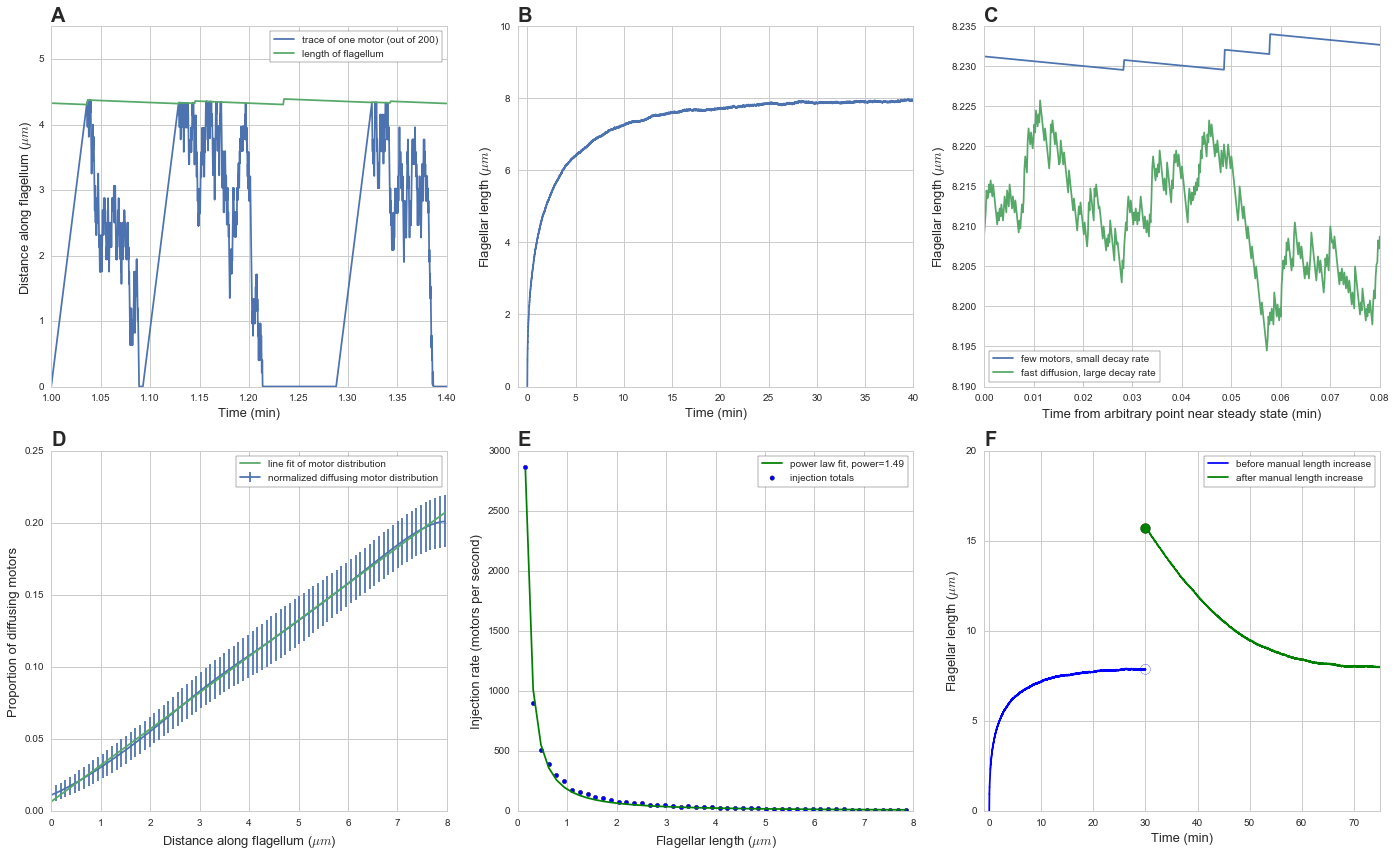

In [35]:
sns.set_style("whitegrid",rc={'font.sans-serif':u'Arial'})

labelsize=20
fig_dict = pic.load(open(path+"fig_agent2.p", "rb"))

fig=plt.figure(1, figsize=(19.5,12),tight_layout=True);


motor_trace=np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace.txt')
motor_trace_len = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace_len.txt')
# journey of single motor
plt.subplot(231)
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['motor'][xleft:xright],label='trace of one motor (out of 200)')
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['L_trace'][xleft:xright],label='length of flagellum')
plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=13)
plt.ylabel(r'Distance along flagellum ($\mu m$)',fontsize=13)
# plt.xlim([xleft*.01/60,xright*.01/60])
# plt.ylim([0,8])
plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace,label='trace of one motor (out of 200)')
plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace_len,label='length of flagellum')
plt.xlim((1,1+.01/60*len(motor_trace)))
plt.ylim([0,5.5])
legend=plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_edgecolor('black')


# L_trace
plt.subplot(232)
plt.plot([i*.01/60 for i in range(len(fig_dict['L_trace']))],fig_dict['L_trace'])
plt.title('B',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=13)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=13)
plt.ylim([0,10])
plt.xlim([-1,40])
plt.grid(True)


# steady state zoom
# sszoomXflip = [.01/60*(len(fig_dict['L_trace'])-i) for i in range(len(fig_dict['ss_zoom']))]
# sszoomX = sszoomXflip[::-1]
plt.subplot(233)
# plt.xlim([sszoomX[0],sszoomX[-1]])
# plt.plot(sszoomX,fig_dict['ss_zoom'])

ss_fluc_small = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_small_2.txt')
ss_fluc_big = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_big_2.txt')
plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_small,
         label='few motors, small decay rate')
plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_big,
         label=r'fast diffusion, large decay rate')
plt.title('C',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time from arbitrary point near steady state (min)',fontsize=13)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=13)
plt.xlim([0,.08])
legend=plt.legend(frameon=True,loc=3)
frame = legend.get_frame()
frame.set_edgecolor('black')


plt.subplot(234)
L=np.mean(fig_dict['L_trace'][-3000:])

dat=np.loadtxt(path+'distr_dat.txt')
dat=dat[1:,:]
dat_mean = [np.mean(dat[:,i]) for i in range(len(dat[0,:]))]
dat_std = [np.std(dat[:,i]) for i in range(len(dat[0,:]))]

dat_mean=dat_mean[0:np.argmax(dat_mean)]
dat_std=dat_std[0:np.argmax(dat_mean)]

pm = dat_mean[::20]
ps = dat_std[::20]
x=np.linspace(0,L,len(pm))
[m,b] = np.polyfit(x,pm,1)

plt.errorbar(x,pm,ps, label='normalized diffusing motor distribution')
plt.plot(x,[m*i+b for i in x], label='line fit of motor distribution')
plt.title('D',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Distance along flagellum ($\mu m$)',fontsize=13)
plt.ylabel('Proportion of diffusing motors',fontsize=13)
plt.xlim([0,8])
plt.ylim([0,.25])
legend=plt.legend(frameon=True)
frame=legend.get_frame()
frame.set_edgecolor('black')



plt.subplot(235)
#these files generated at cell_multi.py
bin_means=np.loadtxt(path+'bin_means.txt') #from cell_multi.py
bin_edges=np.loadtxt(path+'bin_edges.txt')
def f_ava(x,a,b):
    return a/(x**b)
popt_ava,pcov_ava=op.curve_fit(f_ava,bin_edges,bin_means)

# ava_filt=sig.medfilt(fig_dict['avaT'],3)
# plt.plot(fig_dict['L_trace'],ava_filt)
plt.scatter(bin_edges,bin_means, label='injection totals')
plt.plot(bin_edges,f_ava(bin_edges,*popt_ava),c='g',label='power law fit, power=%s'%round(popt_ava[1],2))

plt.title('E',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Flagellar length ($\mu m$)',fontsize=13)
# plt.ylabel('Median filtered injection size (number of motors)')
plt.ylabel('Injection rate (motors per second)',fontsize=13)
plt.ylim([0,3000])
plt.xlim([0,8])
legend=plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_edgecolor('black')



# Hand of god: altering length manually and watching it go back to steady state
plt.subplot(236)
(hog, hogtime) = pic.load(open(path+"fig_hog.p", "rb"))
plt.plot([i*.01/60 for i in range(hogtime)],hog[0:hogtime],c='b',label='before manual length increase')
plt.plot([i*.01/60 for i in range(hogtime,len(hog))],hog[hogtime:],c='g',label='after manual length increase')
plt.scatter([(hogtime-1)*.01/60],[hog[hogtime-1]],s=100,facecolors='none',marker='o',edgecolors='b')
plt.scatter([hogtime*.01/60],[hog[hogtime]],s=100,c='g',marker='o')
plt.title('F',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=13)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=13)
plt.ylim([0,20])
plt.xlim([-1,len(hog)*.01/60])
legend=plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_edgecolor('black')

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(6.5, 4, forward=True)

plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig02_singleflag.png')
# plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig02_singleflag.eps', format='eps', dpi=900)
plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/final_version/Figure 2.png', format='png', dpi=1200)#, bbox_inches='tight')


In [ ]:

# xleft=14719 #arbitrary, tried to find a good example of all the stages of a motor's journey
# xright=17719+1000

# # journey of single motor
# plt.subplot(231)
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['motor'][xleft:xright],label='trace of one motor (out of 200)')
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['L_trace'][xleft:xright],label='length of flagellum')
# plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'distance along flagella ($\mu m$)',fontsize=13)
# plt.xlim([xleft*.01/60,xright*.01/60])
# plt.ylim([0,8])
# legend=plt.legend(frameon=True)
# frame = legend.get_frame()
# frame.set_edgecolor('black')


In [ ]:
# motor_trace=np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace.txt')
# motor_trace_len = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace_len.txt')
# # journey of single motor
# plt.subplot(231)
# # plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['motor'][xleft:xright],label='trace of one motor (out of 200)')
# # plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['L_trace'][xleft:xright],label='length of flagellum')
# plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'distance along flagella ($\mu m$)',fontsize=13)
# # plt.xlim([xleft*.01/60,xright*.01/60])
# # plt.ylim([0,8])
# plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace,label='trace of one motor (out of 200)')
# plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace_len,label='length of flagellum')
# plt.xlim((1,1+.01/60*len(motor_trace)))
# plt.ylim([0,5.5])
# legend=plt.legend(frameon=True)
# frame = legend.get_frame()
# frame.set_edgecolor('black')


In [ ]:

# # L_trace
# plt.subplot(232)
# plt.plot([i*.01/60 for i in range(len(fig_dict['L_trace']))],fig_dict['L_trace'])
# plt.title('B',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'flagellar length ($\mu m$)',fontsize=13)
# plt.ylim([0,10])
# plt.xlim([0,40])
# plt.grid(True)

In [ ]:

# # steady state zoom
# sszoomXflip = [.01/60*(len(fig_dict['L_trace'])-i) for i in range(len(fig_dict['ss_zoom']))]
# sszoomX = sszoomXflip[::-1]
# plt.subplot(233)
# plt.xlim([sszoomX[0],sszoomX[-1]])
# plt.plot(sszoomX,fig_dict['ss_zoom'])
# plt.title('C',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'flagellar length ($\mu m$)',fontsize=13)


In [ ]:

# # steady state zoom
# # sszoomXflip = [.01/60*(len(fig_dict['L_trace'])-i) for i in range(len(fig_dict['ss_zoom']))]
# # sszoomX = sszoomXflip[::-1]
# plt.subplot(233)
# # plt.xlim([sszoomX[0],sszoomX[-1]])
# # plt.plot(sszoomX,fig_dict['ss_zoom'])

# ss_fluc_small = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_small_2.txt')
# ss_fluc_big = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_big_2.txt')
# plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_small,label='few motors, small decay rate')
# plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_big,label='fast diffusion, large decay rate')
# plt.title('C',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('time (min) from arbitrary point near steady state',fontsize=13)
# plt.ylabel(r'flagellar length ($\mu m$)',fontsize=13)
# plt.xlim([0,.08])
# legend=plt.legend(frameon=True,loc=3)
# frame = legend.get_frame()
# frame.set_edgecolor('black')

In [ ]:

# plt.subplot(234)
# L=np.mean(fig_dict['L_trace'][-3000:])

# dat=np.loadtxt(path+'distr_dat.txt')
# dat=dat[1:,:]
# dat_mean = [np.mean(dat[:,i]) for i in range(len(dat[0,:]))]
# dat_std = [np.std(dat[:,i]) for i in range(len(dat[0,:]))]

# dat_mean=dat_mean[0:np.argmax(dat_mean)]
# dat_std=dat_std[0:np.argmax(dat_mean)]

# pm = dat_mean[::20]
# ps = dat_std[::20]
# x=np.linspace(0,L,len(pm))
# [m,b] = np.polyfit(x,pm,1)

# plt.errorbar(x,pm,ps, label='normalized diffusing motor distribution')
# plt.plot(x,[m*i+b for i in x], label='line fit of motor distribution')
# plt.title('D',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel(r'Distance along flagellum ($\mu m$)',fontsize=13)
# plt.ylabel('Proportion of diffusing motors',fontsize=13)
# plt.xlim([0,8])
# plt.ylim([0,.25])
# legend=plt.legend(frameon=True)
# frame=legend.get_frame()
# frame.set_edgecolor('black')



In [ ]:

# plt.subplot(235)
# #these files generated at cell_multi.py
# bin_means=np.loadtxt(path+'bin_means.txt') #from cell_multi.py
# bin_edges=np.loadtxt(path+'bin_edges.txt')
# def f_ava(x,a,b):
#     return a/(x**b)
# popt_ava,pcov_ava=op.curve_fit(f_ava,bin_edges,bin_means)

# # ava_filt=sig.medfilt(fig_dict['avaT'],3)
# # plt.plot(fig_dict['L_trace'],ava_filt)
# plt.scatter(bin_edges,bin_means, label='injection totals')
# plt.plot(bin_edges,f_ava(bin_edges,*popt_ava),c='g',label='power law fit, power=%s'%round(popt_ava[1],2))

# plt.title('E',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel(r'Flagellar length ($\mu m$)',fontsize=13)
# # plt.ylabel('Median filtered injection size (number of motors)')
# plt.ylabel('Injection rate (motors per second)',fontsize=13)
# plt.ylim([0,3000])
# plt.xlim([0,8])
# legend=plt.legend(frameon=True)
# frame = legend.get_frame()
# frame.set_edgecolor('black')

In [ ]:

# # Hand of god: altering length manually and watching it go back to steady state
# plt.subplot(236)
# (hog, hogtime) = pic.load(open(path+"fig_hog.p", "rb"))
# plt.plot([i*.01/60 for i in range(hogtime)],hog[0:hogtime],c='b',label='before manual length increase')
# plt.plot([i*.01/60 for i in range(hogtime,len(hog))],hog[hogtime:],c='g',label='after manual length increase')
# plt.scatter([(hogtime-1)*.01/60],[hog[hogtime-1]],s=100,facecolors='none',marker='o',edgecolors='b')
# plt.scatter([hogtime*.01/60],[hog[hogtime]],s=100,c='g',marker='o')
# plt.title('F',fontsize=labelsize,loc='left',fontweight='bold')
# plt.xlabel('time (min)',fontsize=13)
# plt.ylabel(r'flagellar length ($\mu m$)',fontsize=13)
# plt.ylim([0,20])
# plt.xlim([0,len(hog)*.01/60])
# legend=plt.legend(frameon=True)
# frame = legend.get_frame()
# frame.set_edgecolor('black')


In [ ]:
fig

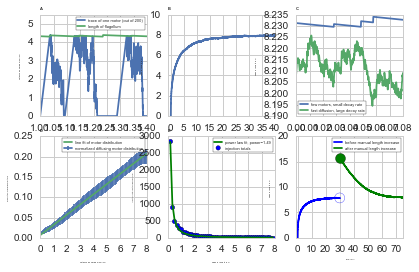

In [24]:
sns.set_style("whitegrid",rc={'font.sans-serif':u'Arial'})

labelsize=4
fontsize=2
legendfont=4
fig_dict = pic.load(open(path+"fig_agent2.p", "rb"))

fig=plt.figure(1, figsize=(6.5,4));


motor_trace=np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace.txt')
motor_trace_len = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace_len.txt')
# journey of single motor
plt.subplot(231)
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['motor'][xleft:xright],label='trace of one motor (out of 200)')
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['L_trace'][xleft:xright],label='length of flagellum')
plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=fontsize)
plt.ylabel(r'Distance along flagellum ($\mu m$)',fontsize=fontsize)
# plt.xlim([xleft*.01/60,xright*.01/60])
# plt.ylim([0,8])
plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace,label='trace of one motor (out of 200)')
plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace_len,label='length of flagellum')
plt.xlim((1,1+.01/60*len(motor_trace)))
plt.ylim([0,5.5])
legend=plt.legend(frameon=True,fontsize=legendfont)
frame = legend.get_frame()
frame.set_edgecolor('black')


# L_trace
plt.subplot(232)
plt.plot([i*.01/60 for i in range(len(fig_dict['L_trace']))],fig_dict['L_trace'])
plt.title('B',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=fontsize)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=fontsize)
plt.ylim([0,10])
plt.xlim([-1,40])
plt.grid(True)


# steady state zoom
# sszoomXflip = [.01/60*(len(fig_dict['L_trace'])-i) for i in range(len(fig_dict['ss_zoom']))]
# sszoomX = sszoomXflip[::-1]
plt.subplot(233)
# plt.xlim([sszoomX[0],sszoomX[-1]])
# plt.plot(sszoomX,fig_dict['ss_zoom'])

ss_fluc_small = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_small_2.txt')
ss_fluc_big = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_big_2.txt')
plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_small,
         label='few motors, small decay rate')
plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_big,
         label=r'fast diffusion, large decay rate')
plt.title('C',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time from arbitrary point near steady state (min)',fontsize=fontsize)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=fontsize)
plt.xlim([0,.08])
legend=plt.legend(frameon=True,loc=3,fontsize=legendfont)
frame = legend.get_frame()
frame.set_edgecolor('black')


plt.subplot(234)
L=np.mean(fig_dict['L_trace'][-3000:])

dat=np.loadtxt(path+'distr_dat.txt')
dat=dat[1:,:]
dat_mean = [np.mean(dat[:,i]) for i in range(len(dat[0,:]))]
dat_std = [np.std(dat[:,i]) for i in range(len(dat[0,:]))]

dat_mean=dat_mean[0:np.argmax(dat_mean)]
dat_std=dat_std[0:np.argmax(dat_mean)]

pm = dat_mean[::20]
ps = dat_std[::20]
x=np.linspace(0,L,len(pm))
[m,b] = np.polyfit(x,pm,1)

plt.errorbar(x,pm,ps, label='normalized diffusing motor distribution')
plt.plot(x,[m*i+b for i in x], label='line fit of motor distribution')
plt.title('D',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Distance along flagellum ($\mu m$)',fontsize=fontsize)
plt.ylabel('Proportion of diffusing motors',fontsize=fontsize)
plt.xlim([0,8])
plt.ylim([0,.25])
legend=plt.legend(frameon=True,fontsize=legendfont)
frame=legend.get_frame()
frame.set_edgecolor('black')



plt.subplot(235)
#these files generated at cell_multi.py
bin_means=np.loadtxt(path+'bin_means.txt') #from cell_multi.py
bin_edges=np.loadtxt(path+'bin_edges.txt')
def f_ava(x,a,b):
    return a/(x**b)
popt_ava,pcov_ava=op.curve_fit(f_ava,bin_edges,bin_means)

# ava_filt=sig.medfilt(fig_dict['avaT'],3)
# plt.plot(fig_dict['L_trace'],ava_filt)
plt.scatter(bin_edges,bin_means, label='injection totals')
plt.plot(bin_edges,f_ava(bin_edges,*popt_ava),c='g',label='power law fit, power=%s'%round(popt_ava[1],2))

plt.title('E',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Flagellar length ($\mu m$)',fontsize=fontsize)
# plt.ylabel('Median filtered injection size (number of motors)')
plt.ylabel('Injection rate (motors per second)',fontsize=fontsize)
plt.ylim([0,3000])
plt.xlim([0,8])
legend=plt.legend(frameon=True,fontsize=legendfont)
frame = legend.get_frame()
frame.set_edgecolor('black')



# Hand of god: altering length manually and watching it go back to steady state
plt.subplot(236)
(hog, hogtime) = pic.load(open(path+"fig_hog.p", "rb"))
plt.plot([i*.01/60 for i in range(hogtime)],hog[0:hogtime],c='b',label='before manual length increase')
plt.plot([i*.01/60 for i in range(hogtime,len(hog))],hog[hogtime:],c='g',label='after manual length increase')
plt.scatter([(hogtime-1)*.01/60],[hog[hogtime-1]],s=100,facecolors='none',marker='o',edgecolors='b')
plt.scatter([hogtime*.01/60],[hog[hogtime]],s=100,c='g',marker='o')
plt.title('F',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=fontsize)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=fontsize)
plt.ylim([0,20])
plt.xlim([-1,len(hog)*.01/60])
legend=plt.legend(frameon=True,fontsize=legendfont)
frame = legend.get_frame()
frame.set_edgecolor('black')

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(6.5, 4, forward=True)

# plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig02_singleflag.png')
# # plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig02_singleflag.eps', format='eps', dpi=900)
# plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/final_version/Figure 2.eps', format='eps', dpi=1200)


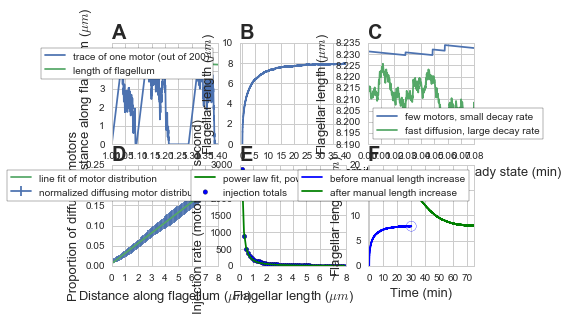

In [29]:
sns.set_style("whitegrid",rc={'font.sans-serif':u'Arial'})

labelsize=20
fig_dict = pic.load(open(path+"fig_agent2.p", "rb"))

fig=plt.figure(1, figsize=(6.5,4),dpi=1200);


motor_trace=np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace.txt')
motor_trace_len = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/motor_trace_len.txt')
# journey of single motor
plt.subplot(231)
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['motor'][xleft:xright],label='trace of one motor (out of 200)')
# plt.plot([i*.01/60 for i in range(xleft,xright)],fig_dict['L_trace'][xleft:xright],label='length of flagellum')
plt.title('A',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=13)
plt.ylabel(r'Distance along flagellum ($\mu m$)',fontsize=13)
# plt.xlim([xleft*.01/60,xright*.01/60])
# plt.ylim([0,8])
plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace,label='trace of one motor (out of 200)')
plt.plot([1+i*.01/60 for i in range(len(motor_trace))],motor_trace_len,label='length of flagellum')
plt.xlim((1,1+.01/60*len(motor_trace)))
plt.ylim([0,5.5])
legend=plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_edgecolor('black')


# L_trace
plt.subplot(232)
plt.plot([i*.01/60 for i in range(len(fig_dict['L_trace']))],fig_dict['L_trace'])
plt.title('B',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=13)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=13)
plt.ylim([0,10])
plt.xlim([-1,40])
plt.grid(True)


# steady state zoom
# sszoomXflip = [.01/60*(len(fig_dict['L_trace'])-i) for i in range(len(fig_dict['ss_zoom']))]
# sszoomX = sszoomXflip[::-1]
plt.subplot(233)
# plt.xlim([sszoomX[0],sszoomX[-1]])
# plt.plot(sszoomX,fig_dict['ss_zoom'])

ss_fluc_small = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_small_2.txt')
ss_fluc_big = np.loadtxt('/Users/student/Box Sync/marshall-lab/revision/figures/ss_fluc_big_2.txt')
plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_small,
         label='few motors, small decay rate')
plt.plot([i*.01/60 for i in range(len(ss_fluc_small))],ss_fluc_big,
         label=r'fast diffusion, large decay rate')
plt.title('C',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time from arbitrary point near steady state (min)',fontsize=13)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=13)
plt.xlim([0,.08])
legend=plt.legend(frameon=True,loc=3)
frame = legend.get_frame()
frame.set_edgecolor('black')


plt.subplot(234)
L=np.mean(fig_dict['L_trace'][-3000:])

dat=np.loadtxt(path+'distr_dat.txt')
dat=dat[1:,:]
dat_mean = [np.mean(dat[:,i]) for i in range(len(dat[0,:]))]
dat_std = [np.std(dat[:,i]) for i in range(len(dat[0,:]))]

dat_mean=dat_mean[0:np.argmax(dat_mean)]
dat_std=dat_std[0:np.argmax(dat_mean)]

pm = dat_mean[::20]
ps = dat_std[::20]
x=np.linspace(0,L,len(pm))
[m,b] = np.polyfit(x,pm,1)

plt.errorbar(x,pm,ps, label='normalized diffusing motor distribution')
plt.plot(x,[m*i+b for i in x], label='line fit of motor distribution')
plt.title('D',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Distance along flagellum ($\mu m$)',fontsize=13)
plt.ylabel('Proportion of diffusing motors',fontsize=13)
plt.xlim([0,8])
plt.ylim([0,.25])
legend=plt.legend(frameon=True)
frame=legend.get_frame()
frame.set_edgecolor('black')



plt.subplot(235)
#these files generated at cell_multi.py
bin_means=np.loadtxt(path+'bin_means.txt') #from cell_multi.py
bin_edges=np.loadtxt(path+'bin_edges.txt')
def f_ava(x,a,b):
    return a/(x**b)
popt_ava,pcov_ava=op.curve_fit(f_ava,bin_edges,bin_means)

# ava_filt=sig.medfilt(fig_dict['avaT'],3)
# plt.plot(fig_dict['L_trace'],ava_filt)
plt.scatter(bin_edges,bin_means, label='injection totals')
plt.plot(bin_edges,f_ava(bin_edges,*popt_ava),c='g',label='power law fit, power=%s'%round(popt_ava[1],2))

plt.title('E',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel(r'Flagellar length ($\mu m$)',fontsize=13)
# plt.ylabel('Median filtered injection size (number of motors)')
plt.ylabel('Injection rate (motors per second)',fontsize=13)
plt.ylim([0,3000])
plt.xlim([0,8])
legend=plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_edgecolor('black')



# Hand of god: altering length manually and watching it go back to steady state
plt.subplot(236)
(hog, hogtime) = pic.load(open(path+"fig_hog.p", "rb"))
plt.plot([i*.01/60 for i in range(hogtime)],hog[0:hogtime],c='b',label='before manual length increase')
plt.plot([i*.01/60 for i in range(hogtime,len(hog))],hog[hogtime:],c='g',label='after manual length increase')
plt.scatter([(hogtime-1)*.01/60],[hog[hogtime-1]],s=100,facecolors='none',marker='o',edgecolors='b')
plt.scatter([hogtime*.01/60],[hog[hogtime]],s=100,c='g',marker='o')
plt.title('F',fontsize=labelsize,loc='left',fontweight='bold')
plt.xlabel('Time (min)',fontsize=13)
plt.ylabel(r'Flagellar length ($\mu m$)',fontsize=13)
plt.ylim([0,20])
plt.xlim([-1,len(hog)*.01/60])
legend=plt.legend(frameon=True)
frame = legend.get_frame()
frame.set_edgecolor('black')

# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(6.5, 4, forward=True)

# plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig02_singleflag.png')
# # plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/fig02_singleflag.eps', format='eps', dpi=900)
# plt.savefig('/Users/student/Box Sync/marshall-lab/revision/figures/final_version/Figure 2.png', format='png', dpi=1200,bbox_inches='tight')
